# Chapter 7. Batteries Included: Creating a Python SDK


Make the right things easy and the wrong things hard 

-- Kathy Sierra

https://learning.oreilly.com/library/view/hands-on-apis-for/9781098164409/ch07.html

To create an API data scientists will love, you should give them a software development kit (SDK) to call the API with. This is an extra step that most API producers do not take, but it makes life much easier for your users. In this chapter, you will learn the value of SDKs and benefit from practical tips from several experts, and then you will create a Python SDK for the SWC Fantasy Football API. Building an SDK is the capstone of your Part I portfolio project.

SDKs can include code examples, debuggers, and documentation, but the term commonly refers to a custom software library that acts as a wrapper for your API. It allows developers and data scientists to interact with your API directly in their programming language, without requiring extra code to handle API communication.

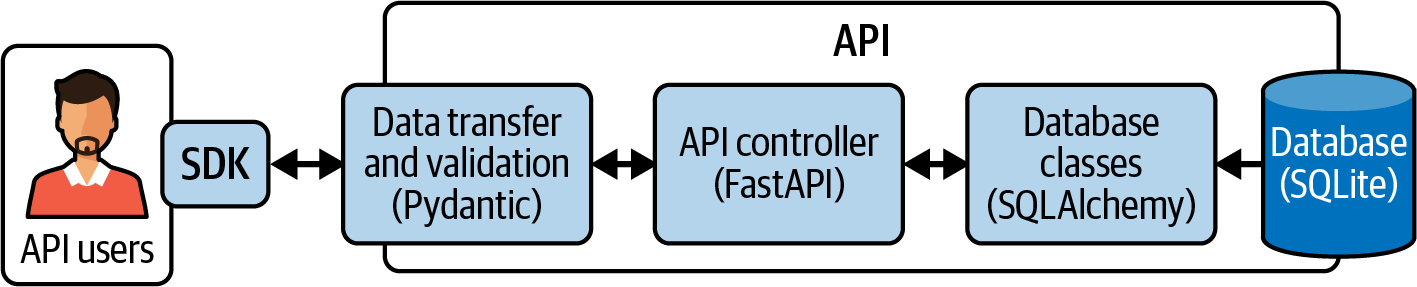

It’s useful to remember that developers and data scientists aren’t using your API out of an interest in APIs—they have a job to do, and the API helps do the job. Wrapping the API in prebuilt program code makes that even simpler. I once conducted a usability session with a data-focused user of an API developer portal. I was surprised (and maybe slightly insulted) when she told me she didn’t care about my APIs—she just wanted the data. For a user like that who just wants the data, an SDK will be a time-saver.

Simon Yu, cofounder of the SDK generation platform Speakeasy, shares additional benefits: “All the boilerplate code that API consumers needed to write before is already taken care of by the SDK library itself. Instead of every consumer re-inventing the wheel themselves (frustrating, time-consuming, error-prone), they simply import the SDK, call the correct method, and go.”

An SDK is a good way to encourage users to use your APIs responsibly by conforming to call limits and sending correctly formatted requests. SDKs make doing the right thing the easy thing.

To get started with a Python SDK, an open source tool like the [OpenAPI Python client](https://github.com/openapi-generators/openapi-python-client) could be used to generate stubs that you could add more functionality to.

The more languages you create SDKs in, the more maintenance they require. Companies like [Speakeasy](https://oreil.ly/speasy), [APIMatic](https://oreil.ly/bpMKs) (publisher of SDKs.io), and [Fern](https://oreil.ly/fern) provide commercial tools that generate SDKs in multiple languages directly from the OpenAPI Specification (OAS) and keep them updated over time.

The SDK code for your project is separate from the API that you created in earlier chapters. You can start here even if you have not completed earlier chapters in this book. Later in this chapter, you will execute the API code so that you can verify the SDK works with your API. Even if you have not completed the earlier chapters, the working API code is available in the chapter6/complete folder.

# Starting with a Minimum Viable SDK

The last part of your Part 1 portfolio project is to create a Python SDK. Throughout this chapter, you will learn tips nad tricks from API experts and implement Python features inspired by them: Francisco Goitia's [statsbompy](https://oreil.ly/LUiJd), SDKs from Simon Yu's company Speakeasy, and Joey Greco's [pymfl](https://oreil.ly/ut2nK), along with additional reference documentation.

You will start with a very simple working SDK to make sure the project packaging is working. I'll call this your _minimum viable SDK_. After you verify the package works and can be installed, you will add additional features.

## Expert tip: Making Your SDK Easy to Install

...if htey can install a Python library with pip install and start using the data, it makes their life easier   - Fransisco goitia, StatsBomb


Many programming languages have a standard method of downloading and installing libraries frmo an external repository, such as npm for Node.js and Maven for Java. Python SDKs are commonly published on the [Python Package Index (PyPi)](https://pypi.org/). Hosting an SDK on PyPI enables Python developers to install the SDK into their environment using the `pip3` tool, as you have done in earlier chapters with libraries such as FastAPI and SQLAlchemy. the `pip3` tool can also instsall packages directly from a GitHub repository, if the project is structured correctly. This is how you will structure your SDK project and give instructions to users. As a bonus, this structure is what is needed to publish to PyPI if you choose to. 

Change the directory to _chapter7_ and create the _sdk_ folder. then, change to the _sdk_ directory and create a file named _pyproject.toml_. 

```bash
.../portfolio-project (main) $ cd chapter7
.../chapter7 (main) $ mkdir sdk
.../chapter7 (main) $ cd sdk
.../sdk (main) $ touch pyproject.toml
```

For the overall style of your SDK, you will be using [PEP 8 – Style Guide for Python Code](https://oreil.ly/oersV). The [official Python docs](https://oreil.ly/csNt5) provide a good summary of PEP 8 style: use 4-space indentations, keep lines to 79 characters or less, and use UpperCamelCase for classes and lowercase_with_underscores for functions and methods.